**PROJECT OBJECTIVE**

 Design a Deep Learning based algorithm for detecting pneumonia

 https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/overview

# Business Context

Computer vision can be used in health care for identifying diseases. In Pneumonia detection we need to detect Inflammation of  the  lungs. We need to  build  an  algorithm  to  detect  a  visual  signal  for  pneumonia  in  medical images. Specifically, your algorithm needs to automatically locate lung opacities on chest radiographs.

# Data description

### File descriptions

**stage_2_train.csv**

The training set. Contains patientIds and bounding box / target information.

**stage_2_sample_submission.csv**

A sample submission file in the correct format. Contains patientIds for the test set. Note that the sample submission contains one box per image, but there is no limit to the number of bounding boxes that can be assigned to a given image.

**stage_2_detailed_class_info.csv**

Provides detailed information about the type of positive or negative class for each image.

**stage_2_train_images.zip**

Provide training images DICOM files (*.dcm)

**stage_2_test_images.zip**

Provide test images DICOM files (*.dcm)

### Data Fields

**patientId**

A patientId. Each patientId corresponds to a unique image.

**x**

The upper-left x coordinate of the bounding box.

**y**

The upper-left y coordinate of the bounding box.

**width**

The width of the bounding box.

**height**

The height of the bounding box.

**Target**

The binary Target, indicating whether this sample has evidence of pneumonia.

### Output Format

patient-id, confidence x-min y-min width height

**A properly formatted row may look like any of the following**

**For patientIds with no predicted pneumonia / bounding boxes:**

0004cfab-14fd-4e49-80ba-63a80b6bddd6,

**For patientIds with a single predicted bounding box:**

0004cfab-14fd-4e49-80ba-63a80b6bddd6,0.5 0 0 100 100

**For patientIds with multiple predicted bounding boxes:**

0004cfab-14fd-4e49-80ba-63a80b6bddd6,0.5 0 0 100 100 0.5 0 0 100 100, etc.

### Note

In the dataset, some of the features are labeled “Not Normal No Lung Opacity”. This extra third class indicates that while pneumonia was determined not to be present, there was nonetheless some type of abnormality on the image and oftentimes this finding may mimic the appearance of true pneumonia.

**Dicom original images:** Medical images are stored in a special format called DICOM files (*.dcm). They contain a combination of header metadata as well as underlying raw image arrays for pixel data.


# Milestone 1

## Load Required Libraries

In [1]:
!pip install pydicom matplotlib numpy torch torchvision h5py
!pip install import-ipynb


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\Sunidhi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\Sunidhi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import zipfile
import import_ipynb 

## Data Overview

### Importing Data

In [3]:
# Url for dataset
detailed_class_info_url = "https://olympus.mygreatlearning.com/courses/113998/files/11957363/download?verifier=kyFqLBXBDsEgzWz1aWhiWhCmoSd9lEFs93RoVn83&wrap=1"
train_labels_url = "https://olympus.mygreatlearning.com/courses/113998/files/11957361/download?verifier=gjIKHXYJtnXJN4WDxwjXAyrlD6m6KPHEe3yWfc9g&wrap=1"
train_image_url = "https://olympus.mygreatlearning.com/courses/113998/files/11957365/download?verifier=ARH3Bm7VVX2h5IIz2447fTfbwxytlOfuXhhoX0EO&wrap=1"
test_image_url = "https://olympus.mygreatlearning.com/courses/113998/files/11957360/download?verifier=h4cqVwziagMoSCAoFvqHbhMaU0rQlHcfrdV9AycR&wrap=1"

In [4]:
from imgproc import StreamedDicomProcessor

In [ ]:
import os
# Extract train images from zip files
img_processor = StreamedDicomProcessor("./train")
train_images_dict = {}
train_images = img_processor.process_from_url(train_image_url)
train_images_count =  0
try:
    for filename, path in train_images:
        base = os.path.basename(filename)
        patient_id = os.path.splitext(base)[0]
        train_images_dict[patient_id] = path
        train_images_count = train_images_count + 1
except Exception as e:
    print('Error:', e)
print("Tain images count:", train_images_count)

In [ ]:
import os
# Extract test images from zip files
img_processor = StreamedDicomProcessor("./test")
test_images_dict = {}
test_images = img_processor.process_from_url(test_image_url)
try:
    for filename, path in test_images:
        base = os.path.basename(filename)
        patient_id = os.path.splitext(base)[0]
        test_images_dict[patient_id] = path
except Exception as e:
    print('Error:', e)

stage_2_test_images/2392af63-9496-4e72-b348-9276432fd797.dcm ./test\2392af63-9496-4e72-b348-9276432fd797.png
Skipped __MACOSX/stage_2_test_images/._2392af63-9496-4e72-b348-9276432fd797.dcm: File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.
stage_2_test_images/2ce40417-1531-4101-be24-e85416c812cc.dcm ./test\2ce40417-1531-4101-be24-e85416c812cc.png
Skipped __MACOSX/stage_2_test_images/._2ce40417-1531-4101-be24-e85416c812cc.dcm: File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.
stage_2_test_images/2bc0fd91-931a-446f-becb-7a6d3f2a7678.dcm ./test\2bc0fd91-931a-446f-becb-7a6d3f2a7678.png
Skipped __MACOSX/stage_2_test_images/._2bc0fd91-931a-446f-becb-7a6d3f2a7678.dcm: File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.
stage_2_test_images/29d42f45-50

#### Import training annotation

In [7]:
df_train = pd.read_csv(train_labels_url)

In [8]:
df_train.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [9]:
df_train.shape

(30227, 6)

In [10]:
df_train.isnull().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

In [11]:
df_train["patientId"].unique()

array(['0004cfab-14fd-4e49-80ba-63a80b6bddd6',
       '00313ee0-9eaa-42f4-b0ab-c148ed3241cd',
       '00322d4d-1c29-4943-afc9-b6754be640eb', ...,
       'c1edf42b-5958-47ff-a1e7-4f23d99583ba',
       'c1f6b555-2eb1-4231-98f6-50a963976431',
       'c1f7889a-9ea9-4acb-b64c-b737c929599a'],
      shape=(26684,), dtype=object)

In [12]:
df_train['patientId'].duplicated().sum()

np.int64(3543)

#### Import class information data

In [13]:
df_class_info = pd.read_csv(detailed_class_info_url)

In [14]:
df_class_info.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [15]:
df_class_info.shape

(30227, 2)

In [16]:
df_class_info.isna().sum()

patientId    0
class        0
dtype: int64

In [17]:
# Merge on 'patientId'
df_merged = pd.merge(df_train, df_class_info, on='patientId', how='inner')


In [18]:
df_merged.head()

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity


### Map training and testing images to its classes.

In [19]:
df_merged['image_path'] = './out/' + df_merged['patientId'] + '.png'

In [20]:
df_merged.head()

,patientId,x,y,width,height,Target,class,image_path
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,./out/0004cfab-14fd-4e49-80ba-63a80b6bddd6.png
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,./out/00313ee0-9eaa-42f4-b0ab-c148ed3241cd.png
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,./out/00322d4d-1c29-4943-afc9-b6754be640eb.png
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal,./out/003d8fa0-6bf1-40ed-b54c-ac657f8495c5.png
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity,./out/00436515-870c-4b36-a041-de91049b9ab4.png


In [21]:
#Extract all images


### Map training and testing images to its annotations

In [22]:
# Group bounding boxes by patientId
bboxes_per_patient = df_merged.groupby('patientId').apply(
    lambda g: g[['x', 'y', 'width', 'height', 'Target']].to_dict('records')
).to_dict()

C:\Users\Sunidhi\AppData\Local\Temp\ipykernel_16836\2394229630.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bboxes_per_patient = df_merged.groupby('patientId').apply(


 ## Display images with bounding box.

NameError: name 'train_images' is not defined

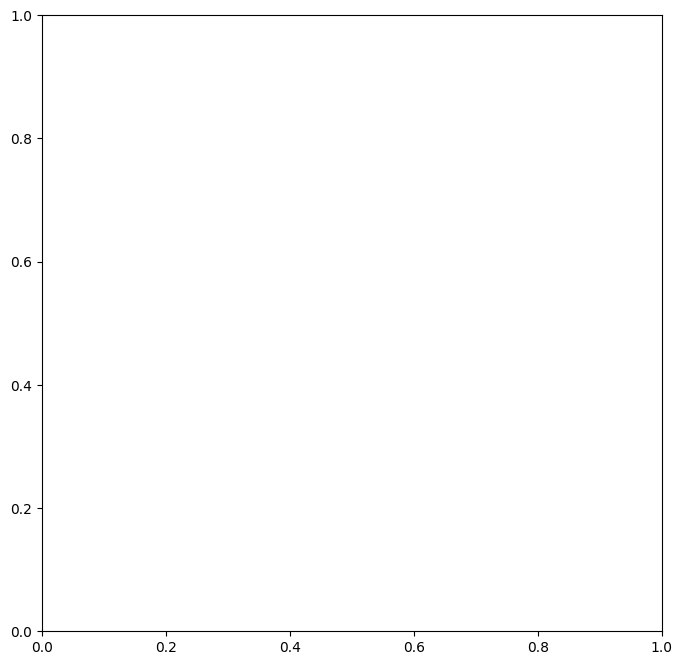

In [23]:

fig, ax = plt.subplots(1, figsize=(8,8))
first = next(train_images, None)

# Draw bounding boxes
ax.imshow(first)

for bbox in bboxes_per_patient[:10]:
    color = 'r' if bbox['Target'] == 1 else 'g'
    rect = patches.Rectangle(
        (bbox['x'], bbox['y']), bbox['width'], bbox['height'],
        linewidth=2, edgecolor=color, facecolor='none'
    )
    ax.add_patch(rect)
    ax.text(bbox['x'], bbox['y']-5, f"T:{bbox['Target']}", color='blue', fontsize=8)

plt.title('Image with Bounding Boxes')
plt.axis('off')
plt.show()


### Preprocessing and Visualisation of different classes

#### Pre-processing

#### Visulization of class

C:\Users\Sunidhi\AppData\Local\Temp\ipykernel_22732\2932288343.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=df_train, palette='Set1')


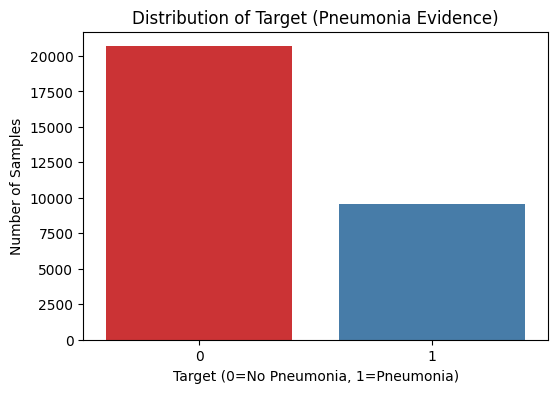

In [ ]:
# Visualize the class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Target', data=df_train, palette='Set1')
plt.title('Distribution of Target (Pneumonia Evidence)')
plt.xlabel('Target (0=No Pneumonia, 1=Pneumonia)')
plt.ylabel('Number of Samples')
plt.show()

**Observation**

- There is class imbalance.
- Number of no pneumonia is more than the pneumonia

#### Bounding Box Visualisation

In [ ]:
!pip install seaborn
first_filename, first_saved_path = next(img_processor.process_from_url(train_image_url))


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\Sunidhi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


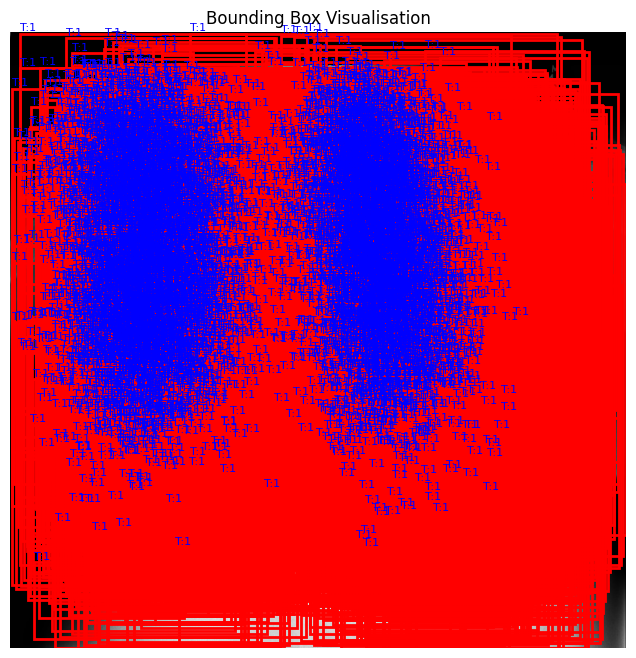

In [ ]:
import cv2
# Load and convert the image
image = cv2.imread(first_saved_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_processor.visualize_bboxes(image_rgb, df_train)

**Observation**

- This shows most of the patient diagnosed with pneumonia have the lung opacity at top left corner of the lungs

#### Box Size distribution

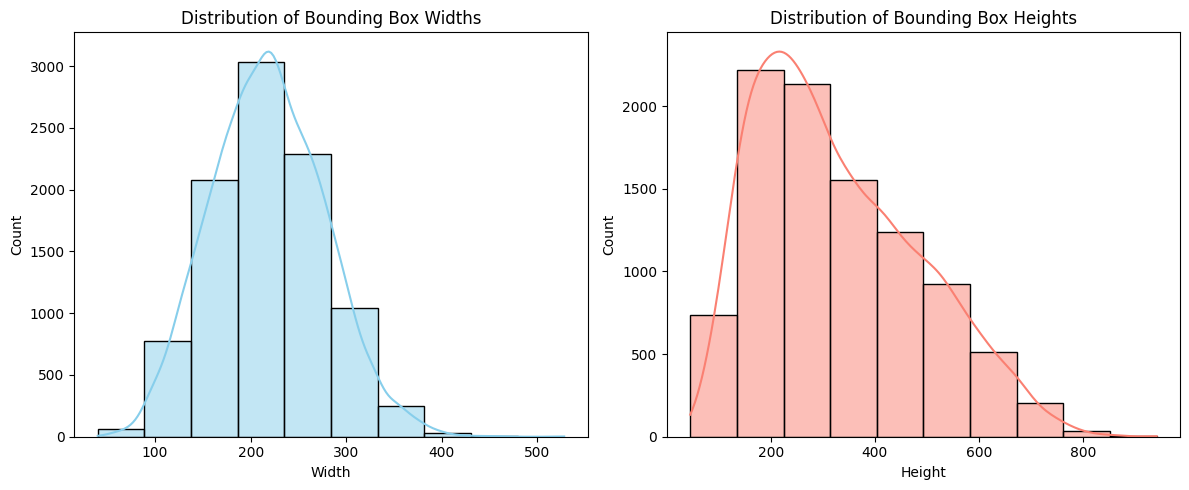

In [ ]:
# Visualize distribution of bounding box dimensions
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df_train['width'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Bounding Box Widths')
plt.xlabel('Width')

plt.subplot(1,2,2)
sns.histplot(df_train['height'], bins=10, kde=True, color='salmon')
plt.title('Distribution of Bounding Box Heights')
plt.xlabel('Height')

plt.tight_layout()
plt.show()


This shows the distribution of bounding box sizes, which can help understand the size variation of pneumonia regions

#### Box Position Scatter Plot

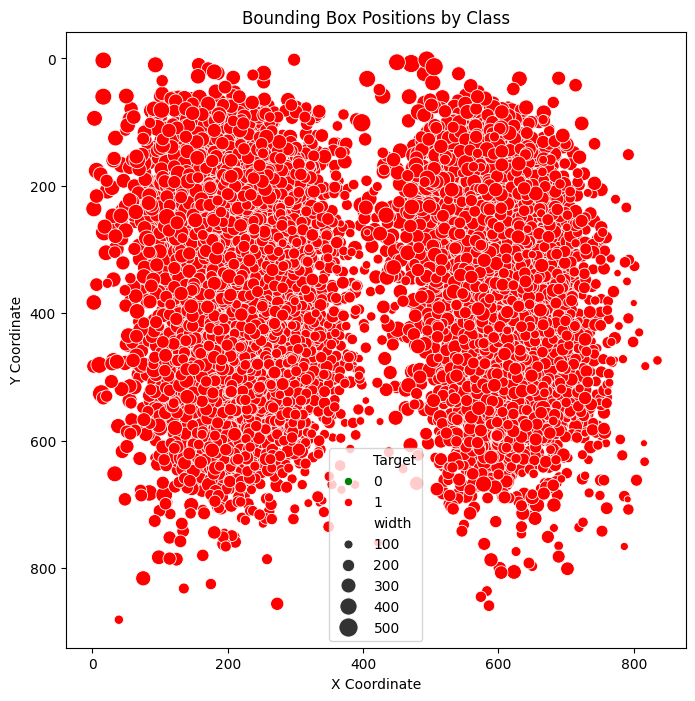

In [ ]:
# Create a scatter plot of bounding box positions
plt.figure(figsize=(8,8))
sns.scatterplot(
    x='x', y='y',
    hue='Target',
    size='width', sizes=(20, 200),
    data=df_train, palette=['green', 'red']
)
plt.title('Bounding Box Positions by Class')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.gca().invert_yaxis()  # Invert Y-axis to match image coordinates
plt.show()

This visualizes where pneumonia tends to appear in the radiographs (upper/lower lungs, etc.).

#### Box Area Analysis with class

C:\Users\Sunidhi\AppData\Local\Temp\ipykernel_22732\1342117920.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y='area', data=df_train, palette='Set2')


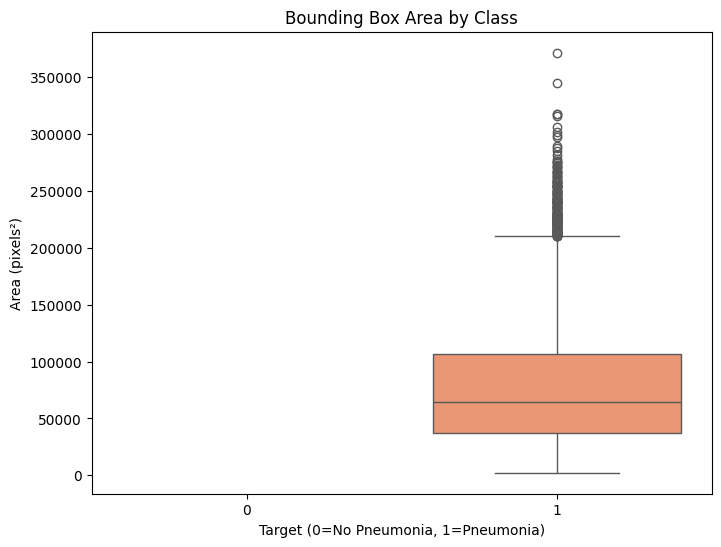

In [ ]:
# Add area column
df_train['area'] = df_train['width'] * df_train['height']

# Box plot of areas by class
plt.figure(figsize=(8,6))
sns.boxplot(x='Target', y='area', data=df_train, palette='Set2')
plt.title('Bounding Box Area by Class')
plt.xlabel('Target (0=No Pneumonia, 1=Pneumonia)')
plt.ylabel('Area (pixels²)')
plt.show()


This compares the size of pneumonia regions versus non-pneumonia annotations.
As person don't have pneumonia so there are no bbox hence 0 area for target class 0

#### Heatmap of bounding box centers

C:\Users\Sunidhi\AppData\Local\Temp\ipykernel_22732\2926993653.py:19: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=normal_df['center_x'], y=normal_df['center_y'],


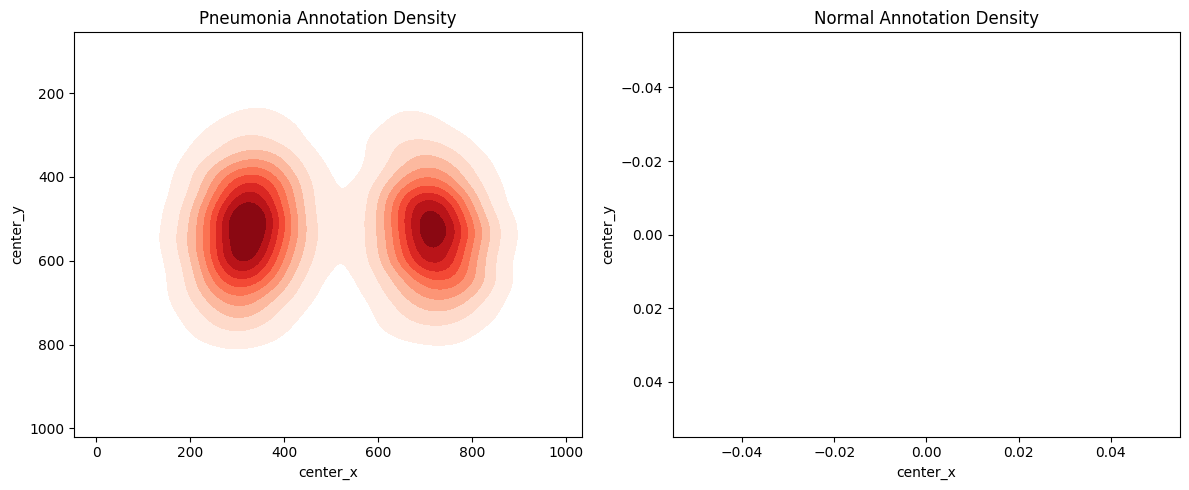

In [ ]:
# Calculate centers of bounding boxes
df_train['center_x'] = df_train['x'] + df_train['width']/2
df_train['center_y'] = df_train['y'] + df_train['height']/2

# Create separate DataFrames for each class
pneumonia_df = df_train[df_train['Target'] == 1]
normal_df = df_train[df_train['Target'] == 0]

# Plot heatmaps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Pneumonia heatmap
sns.kdeplot(x=pneumonia_df['center_x'], y=pneumonia_df['center_y'],
            cmap='Reds', fill=True, ax=ax1)
ax1.set_title('Pneumonia Annotation Density')
ax1.invert_yaxis()

# Normal heatmap
sns.kdeplot(x=normal_df['center_x'], y=normal_df['center_y'],
            cmap='Blues', fill=True, ax=ax2)
ax2.set_title('Normal Annotation Density')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()


This creates heatmaps showing the spatial distribution of annotations, helping identify common locations of pneumonia findings.

#### Distribution of patient classes

<ipython-input-33-a1ed466b85ff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_class_info, x='class', palette='Set2')


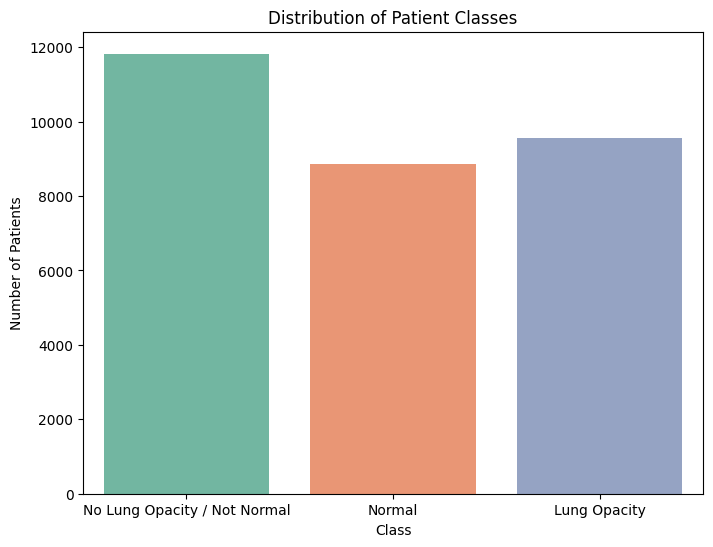

In [ ]:
# Plotting the class distribution
plt.figure(figsize=(8,6))
sns.countplot(data=df_class_info, x='class', palette='Set2')
plt.title('Distribution of Patient Classes')
plt.xlabel('Class')
plt.ylabel('Number of Patients')
plt.show()

**Observation**

There is a major portion of patients who don't have any lung opacity yet they have pneumonia. 

## Model Training

### Design, train and test basic CNN models for classification

# Milestone 2

## Fine tune the trained basic CNN models for classification

## Apply Transfer Learning model for classification

## Design,  train  and  test  RCNN  &  its  hybrids  based  object  detection  models  to  impose  the  bounding  box  or mask over the area of interest

 ## Pickle the model for future prediction

# Milestone 3

## Design a clickable UI based interface which can allow the user to browse & input the image, output the class and the bounding box or mask [ highlight area of interest ] of the input images

# References

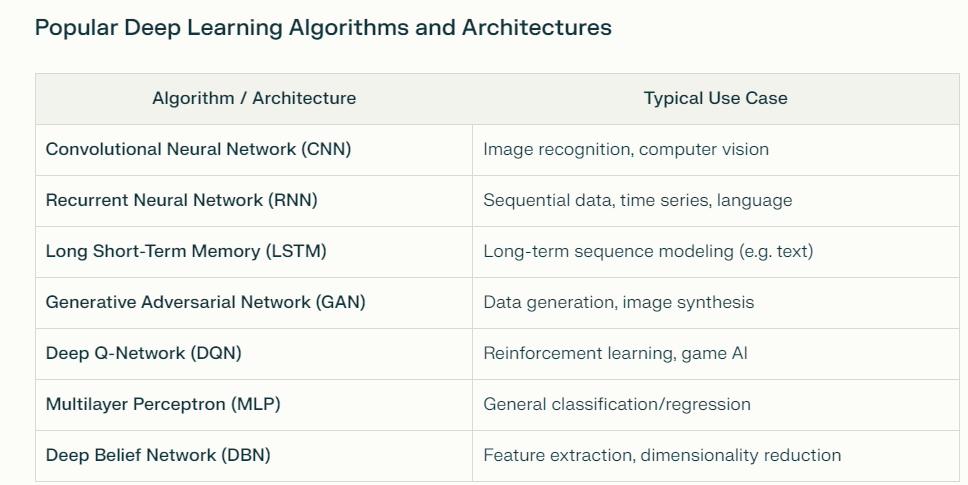

 https://www.mygreatlearning.com/blog/object-detection-using-tensorflow/


https://www.mygreatlearning.com/blog/yolo-object-detection-using-opencv/?highlight=detection

 https://www.mygreatlearning.com/blog/cnn-model-architectures-and-applications/

## For GUI APP

**TKinter**

https://www.studytonight.com/tkinter/introduction-to-python-tkinter-module

**Flask Tutorials**

1. **DigitalOcean: How to Make a Web Application Using Flask in Python 3**

Step-by-step guide to building a simple Flask web app from scratch.
https://www.digitalocean.com/community/tutorials/how-to-make-a-web-application-using-flask-in-python-3

2. **Flask Official Documentation & Tutorial**

The official Flask docs with a quickstart and a more detailed tutorial.
https://flask.palletsprojects.com/en/stable/

3. **YouTube: How to Create a Web Application in Python using Flask**

Video tutorial for beginners on building a Flask app.
https://www.youtube.com/watch?v=jQjjqEjZK58

4. **Flask Tutorial in Visual Studio Code**

Guide for building a Flask app with VS Code.
https://code.visualstudio.com/docs/python/tutorial-flask

**Django Tutorials**

1. **Real Python: Get Started With Django (Build a Portfolio App)**

A beginner-friendly, step-by-step Django tutorial.

https://realpython.com/get-started-with-django-1/

2. **Django Official Documentation**

The official docs and tutorials from the Django project.

https://docs.djangoproject.com/en/5.2/


**Flask vs. Django Comparison**

https://www.bitcot.com/flask-vs-django/


## Terms

1. chest radiograph (CXR)
2. clinical history, vital signs and laboratory exams
3.  Pneumonia usually manifests as an area or areas of increased opacity [3] on CXR. However, the diagnosis of pneumonia on CXR is complicated because of a number of other conditions in the lungs such as fluid overload (pulmonary edema), bleeding, volume loss (atelectasis or collapse), lung cancer, or post-radiation or surgical changes. Outside of the lungs, fluid in the pleural space (pleural effusion) also appears as increased opacity on CXR. When available, comparison of CXRs of the patient taken at different time points and correlation with clinical symptoms and history are helpful in making the diagnosis.
4. CXRs are the most commonly performed diagnostic imaging study. A number of factors such as positioning of the patient and depth of inspiration can alter the appearance of the CXR [4], complicating interpretation further. In addition, clinicians are faced with reading high volumes of images every shift.
5. The RSNA is an international society of radiologists, medical physicists and other medical professionals with more than 54,000 members from 146 countries across the globe. They see the potential for ML to automate initial detection (imaging screening) of potential pneumonia cases in order to prioritize and expedite their review.

### Testing

www.kaggle.com/competitions/rsna-pneumonia-detection-challenge/overview/evaluation
